In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [26]:
ds=pd.read_csv('salaries.csv')
ds.head()

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [27]:
#name and weight not relevant
ds.drop(['Name','Weight'],axis=1,inplace=True)

In [28]:
ds['College'].unique()

array(['Texas', 'Marquette', 'Boston University', 'Georgia State', nan,
       'LSU', 'Gonzaga', 'Louisville', 'Oklahoma State', 'Ohio State',
       'Washington', 'Kentucky', 'North Carolina', 'Arizona',
       'Georgia Tech', 'Cincinnati', 'Miami (FL)', 'Stanford', 'Syracuse',
       'Saint Louis', 'Kansas', 'Georgetown', 'Texas A&M', 'UCLA', 'UNLV',
       'Wichita State', "Saint Joseph's", 'Notre Dame', 'Norfolk State',
       'Duke', 'Murray State', 'Tennessee State', 'Bowling Green',
       'Purdue', 'Wake Forest', 'Michigan', 'Missouri', 'USC',
       'Villanova', 'Rider', 'Utah', 'Belmont', 'Davidson', 'Vanderbilt',
       'Michigan State', 'Florida', 'Washington State', 'Arizona State',
       'Oklahoma', 'Wyoming', "St. John's", 'Maryland', 'Wisconsin',
       'Utah Valley', 'North Carolina State', 'UC Santa Barbara',
       'Baylor', 'Connecticut', 'Oregon State', 'New Mexico', 'Oregon',
       'Creighton', 'Arkansas', 'Memphis', "Saint Mary's", 'Tennessee',
       'Alabama'

In [29]:
ds['Position'].unique()

array(['PG', 'SF', 'SG', 'PF', 'C'], dtype=object)

In [30]:
ds['Team'].unique()

array(['Boston Celtics', 'Brooklyn Nets', 'New York Knicks',
       'Philadelphia 76ers', 'Toronto Raptors', 'Golden State Warriors',
       'Los Angeles Clippers', 'Los Angeles Lakers', 'Phoenix Suns',
       'Sacramento Kings', 'Chicago Bulls', 'Cleveland Cavaliers',
       'Detroit Pistons', 'Indiana Pacers', 'Milwaukee Bucks',
       'Dallas Mavericks', 'Houston Rockets', 'Memphis Grizzlies',
       'New Orleans Pelicans', 'San Antonio Spurs', 'Atlanta Hawks',
       'Charlotte Hornets', 'Miami Heat', 'Orlando Magic',
       'Washington Wizards', 'Denver Nuggets', 'Minnesota Timberwolves',
       'Oklahoma City Thunder', 'Portland Trail Blazers', 'Utah Jazz'],
      dtype=object)

In [31]:
#encode categorical values
mapping_dict = {'Position':{'PG':0,'SF':1,'SG':2,'PF':3,'C':4}}
ds.replace(mapping_dict,inplace=True)

In [32]:
ds.head()

,Team,Number,Position,Age,DOJ,College,Salary
0,Boston Celtics,0,0,25,06-Feb,Texas,7730337.0
1,Boston Celtics,99,1,25,06-Jun,Marquette,6796117.0
2,Boston Celtics,30,2,27,06-May,Boston University,NaN
3,Boston Celtics,28,2,22,06-May,Georgia State,1148640.0
4,Boston Celtics,8,3,29,06-Oct,NaN,5000000.0


In [33]:
ds.isnull().sum()

Team         0
Number       0
Position     0
Age          0
DOJ          0
College     84
Salary      11
dtype: int64

In [34]:
ds.fillna(ds['Salary'].mean(),inplace=True)

In [35]:
ds.fillna(ds['College'].mode(),inplace=True)

In [36]:
ds.isnull().sum()

Team        0
Number      0
Position    0
Age         0
DOJ         0
College     0
Salary      0
dtype: int64

In [37]:
ds.describe()

,Number,Position,Age,Salary
count,457.000000,457.000000,457.000000,4.570000e+02
mean,17.678337,1.971554,26.938731,4.842684e+06
std,15.966090,1.376996,4.404016,5.165781e+06
min,0.000000,0.000000,19.000000,3.088800e+04
25%,5.000000,1.000000,24.000000,1.100602e+06
50%,13.000000,2.000000,26.000000,2.869440e+06
75%,25.000000,3.000000,30.000000,6.331404e+06
max,99.000000,4.000000,40.000000,2.500000e+07


In [38]:
ds.skew()

Number      1.668386
Position   -0.019574
Age         0.626349
Salary      1.595511
dtype: float64

In [39]:
ds.shape

(457, 7)

In [40]:
x=ds.iloc[:,0:-1]
x.shape
y=ds.iloc[:,-1]
y.head

<bound method NDFrame.head of 0      7.730337e+06
1      6.796117e+06
2      4.842684e+06
3      1.148640e+06
4      5.000000e+06
           ...     
452    2.239800e+06
453    2.433333e+06
454    9.000000e+05
455    2.900000e+06
456    9.472760e+05
Name: Salary, Length: 457, dtype: float64>

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['Team'] = le.fit_transform(x['Team'])

In [42]:
x['Team']

0       1
1       1
2       1
3       1
4       1
       ..
452    28
453    28
454    28
455    28
456    28
Name: Team, Length: 457, dtype: int32

In [43]:
ds['College'].isnull().sum()

0

In [44]:
ds.drop('College',axis=1,inplace=True)

In [45]:
ds.head()

,Team,Number,Position,Age,DOJ,Salary
0,Boston Celtics,0,0,25,06-Feb,7.730337e+06
1,Boston Celtics,99,1,25,06-Jun,6.796117e+06
2,Boston Celtics,30,2,27,06-May,4.842684e+06
3,Boston Celtics,28,2,22,06-May,1.148640e+06
4,Boston Celtics,8,3,29,06-Oct,5.000000e+06


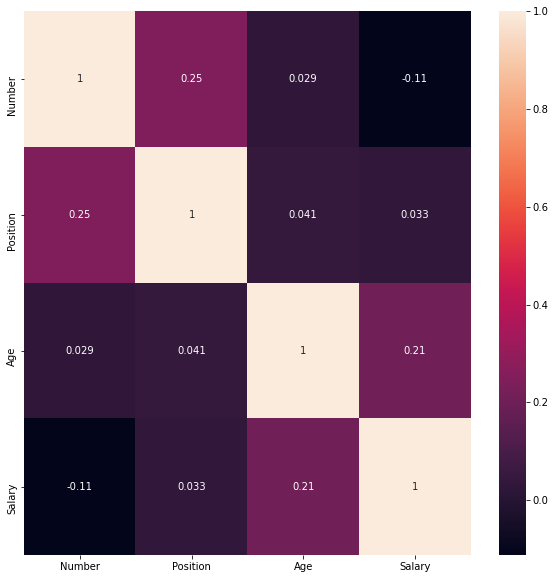

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(ds.corr(),color='k',annot=True)

In [48]:
ds.dtypes

Team         object
Number        int64
Position      int64
Age           int64
DOJ          object
Salary      float64
dtype: object

In [49]:
ds.drop('Team',axis=1,inplace=True)

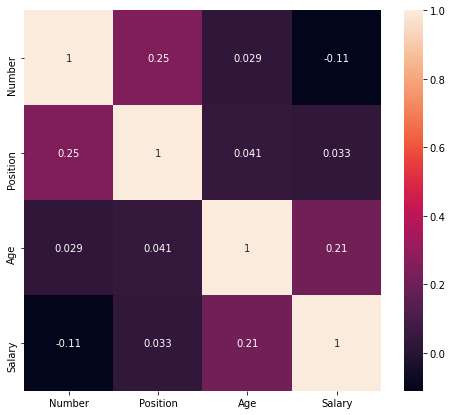

In [67]:
cor_hm = ds.corr()
plt.figure(figsize=(8,7))
sns.heatmap(cor_hm,annot=True)
plt.show()

In [68]:
ds = ds[(z<3).all(axis=1)]

In [69]:
x=ds.iloc[:,0:-1]
y=ds.iloc[:,-1]

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .33,random_state=42)

In [73]:
lm = LinearRegression()